In [1]:
import requests 
from bs4 import BeautifulSoup
import pandas as pd


In [2]:
url = "https://en.wikipedia.org/wiki/Rape_statistics"
response = requests.get(url)
if response.status_code == 200:
    print("Successfully gotten webpage")
else:
    print("failed to get webpage")

Successfully gotten webpage


In [3]:
soup = BeautifulSoup(response.content , 'html.parser')



In [4]:
soup.prettify()

'<!DOCTYPE html>\n<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-custom-font-size-clientpref-1 vector-feature-appearance-enabled vector-feature-appearance-pinned-clientpref-1 vector-feature-night-mode-disabled skin-theme-clientpref-day vector-toc-available" dir="ltr" lang="en">\n <head>\n  <meta charset="utf-8"/>\n  <title>\n   Rape statistics - Wikipedia\n  </title>\n  <script>\n   (function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pin

In [5]:
# Find the section of the webpage that contains rape statistics
# The section is identified by the id="Attendance" attribute
rape_s = soup.find_all('table')[1]

In [12]:
rape_s

<table class="wikitable sortable" style="page-break-before:always;">
<caption>Rape at the national level, number of police-recorded offences, in per 100,000 inhabitants<sup class="reference" id="cite_ref-undata_13-1"><a href="#cite_note-undata-13">[13]</a></sup><sup class="noprint Inline-Template Template-Fact" style="white-space:nowrap;">[<i><a href="/wiki/Wikipedia:Citation_needed" title="Wikipedia:Citation needed"><span title="Some of the countries in the table are not in the source (January 2019)">additional citation(s) needed</span></a></i>]</sup>
</caption>
<tbody><tr>
<th>
</th>
<th colspan="8" style="text-align: center;"><b>Total count</b>
</th>
<th colspan="8" style="text-align: center;"><b>Rate per 100,000 population</b>
</th></tr>
<tr>
<th><b>Country/territory</b>
</th>
<th>2003
</th>
<th>2004
</th>
<th>2005
</th>
<th>2006
</th>
<th>2007
</th>
<th>2008
</th>
<th>2009
</th>
<th>2010
</th>
<th>2003
</th>
<th>2004
</th>
<th>2005
</th>
<th>2006
</th>
<th>2007
</th>
<th>2008
</th

In [13]:
rape_stats = []

In [14]:
rows = rape_s.find_all('tr')

In [15]:
c_list = []
for row in rows[2:]:
    # Find all the cells (td and th elements) in the current row
    cols = row.find_all(['td', 'th'])
    if len(cols) >= 16:
        country_territory = cols[0].get_text(strip=True)
        country_territory = country_territory.replace("'", ' ') 
        c_list.append(country_territory)
c_list

['Kenya',
 'Mauritius',
 'Mozambique',
 'Uganda',
 'Zimbabwe',
 'Cameroon',
 'Algeria',
 'Morocco',
 'Sudan',
 'Botswana',
 'Lesotho',
 'Swaziland',
 'Guinea',
 'Senegal',
 'Sierra Leone',
 'Bahamas',
 'Barbados',
 'Grenada',
 'Jamaica',
 'Saint Kitts and Nevis',
 'Saint Vincent and the Grenadines',
 'Trinidad and Tobago',
 'Belize',
 'Costa Rica',
 'El Salvador',
 'Guatemala',
 'Mexico',
 'Nicaragua',
 'Panama *',
 'Argentina',
 'Bolivia',
 'Chile',
 'Colombia',
 'Ecuador',
 'Guyana',
 'Paraguay',
 'Peru',
 'Suriname',
 'Uruguay',
 'Bermuda',
 'Canada',
 'United States of America',
 'Kazakhstan',
 'Kyrgyzstan',
 'Tajikistan',
 'Turkmenistan',
 'Hong Kong',
 'Japan',
 'Mongolia',
 'Republic of Korea',
 'Brunei Darussalam',
 'Philippines',
 'Singapore',
 'Thailand',
 'Bangladesh',
 'India',
 'Maldives',
 'Nepal',
 'Sri Lanka',
 'Armenia',
 'Azerbaijan',
 'Bahrain',
 'Cyprus',
 'Georgia',
 'Israel',
 'Jordan',
 'Kuwait',
 'Lebanon',
 'Palestinian Territory',
 'Oman',
 'Qatar',
 'Syrian A

In [16]:
for row in rows[2:]:
    # Find all the cells (td and th elements) in the current row
    cols = row.find_all(['td', 'th'])
    if len(cols) >= 16:
        country_territory = cols[0].get_text(strip=True)  
        tc_2003 = cols[1].get_text(strip=True)
        tc_2004 = cols[2].get_text(strip=True)
        tc_2005 = cols[3].get_text(strip=True)
        tc_2006 = cols[4].get_text(strip=True)
        tc_2007 = cols[5].get_text(strip=True)
        tc_2008 = cols[6].get_text(strip=True)
        tc_2009 = cols[7].get_text(strip=True)
        tc_2010 = cols[8].get_text(strip=True)
        rate_2003 = cols[9].get_text(strip=True)
        rate_2004 = cols[10].get_text(strip=True)
        rate_2005 = cols[11].get_text(strip=True)
        rate_2006 = cols[12].get_text(strip=True)
        rate_2007 = cols[13].get_text(strip=True)
        rate_2008 = cols[14].get_text(strip=True)
        rate_2009 = cols[15].get_text(strip=True)
        rate_2010 = cols[16].get_text(strip=True)
          # Create a dictionary with the extracted data and append it to the rape_statistics list
        rape_stats.append({
            "2003_tc": tc_2003,
            "2004_tc": tc_2004,
            "2005_tc": tc_2005,
            "2006_tc": tc_2006,
            "2007_tc": tc_2007,
            "2008_tc": tc_2008,
            "2009_tc": tc_2009,
            "2010_tc": tc_2010,
            "2003_rate": rate_2003,
            "2004_rate": rate_2004,
            "2005_rate": rate_2005,
            "2006_rate": rate_2006,
            "2007_rate": rate_2007,
            "2008_rate": rate_2008,
            "2009_rate": rate_2009,
            "2010_rate": rate_2010,
        })

In [27]:
# Convert list of dictionaries to DataFrame
df_rape_stats = pd.DataFrame(rape_stats)

# Display the DataFrame
df_rape_stats

,2003_tc,2004_tc,2005_tc,2006_tc,2007_tc,2008_tc,2009_tc,2010_tc,2003_rate,2004_rate,2005_rate,2006_rate,2007_rate,2008_rate,2009_rate,2010_rate
0,,1440,1365,1291,876,735,847,,,4.1,3.8,3.5,2.3,1.9,2.1,
1,53,40,38,64,77,69,57,51,4.3,3.2,3.0,5.1,6.0,5.4,4.4,3.9
2,,102,64,46,41,47,44,,,0.5,0.3,0.2,0.2,0.2,0.2,
3,0,549,732,750,599,1536,619,709,2.0,2.0,2.6,2.6,2.0,4.9,1.9,2.1
4,3858,4997,4790,4967,4762,3186,,,30.6,39.7,38.1,39.6,38.2,25.6,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,547,573,646,639,648,612,666,543*,7.5,7.8,8.7,8.6,8.6,8.1,8.7,7.1*
117,,,,,,6382,6343,6378,,,,,,29.7,29.0,28.6
118,,,994,1183,1143,1130,1128,1129,,,24.0,28.3,27.0,26.4,26.1,25.8
119,,,,,,,46647,48259,,,,,,,94,95.9


In [18]:
import numpy as np

In [28]:
df_rape_stats.replace("", np.nan, inplace = True)

In [29]:
df_rape_stats

,2003_tc,2004_tc,2005_tc,2006_tc,2007_tc,2008_tc,2009_tc,2010_tc,2003_rate,2004_rate,2005_rate,2006_rate,2007_rate,2008_rate,2009_rate,2010_rate
0,NaN,1440,1365,1291,876,735,847,NaN,NaN,4.1,3.8,3.5,2.3,1.9,2.1,NaN
1,53,40,38,64,77,69,57,51,4.3,3.2,3.0,5.1,6.0,5.4,4.4,3.9
2,NaN,102,64,46,41,47,44,NaN,NaN,0.5,0.3,0.2,0.2,0.2,0.2,NaN
3,0,549,732,750,599,1536,619,709,2.0,2.0,2.6,2.6,2.0,4.9,1.9,2.1
4,3858,4997,4790,4967,4762,3186,NaN,NaN,30.6,39.7,38.1,39.6,38.2,25.6,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,547,573,646,639,648,612,666,543*,7.5,7.8,8.7,8.6,8.6,8.1,8.7,7.1*
117,NaN,NaN,NaN,NaN,NaN,6382,6343,6378,NaN,NaN,NaN,NaN,NaN,29.7,29.0,28.6
118,NaN,NaN,994,1183,1143,1130,1128,1129,NaN,NaN,24.0,28.3,27.0,26.4,26.1,25.8
119,NaN,NaN,NaN,NaN,NaN,NaN,46647,48259,NaN,NaN,NaN,NaN,NaN,NaN,94,95.9


In [21]:
missing_data = df_rape_stats.isnull()
missing_data.head()

,2003_tc,2004_tc,2005_tc,2006_tc,2007_tc,2008_tc,2009_tc,2010_tc,2003_rate,2004_rate,2005_rate,2006_rate,2007_rate,2008_rate,2009_rate,2010_rate
0,True,False,False,False,False,False,False,True,True,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,True,True,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,True,True,False,False,False,False,False,False,True,True


In [22]:
df_rape_stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   2003_tc    70 non-null     object
 1   2004_tc    83 non-null     object
 2   2005_tc    99 non-null     object
 3   2006_tc    99 non-null     object
 4   2007_tc    87 non-null     object
 5   2008_tc    87 non-null     object
 6   2009_tc    81 non-null     object
 7   2010_tc    60 non-null     object
 8   2003_rate  70 non-null     object
 9   2004_rate  83 non-null     object
 10  2005_rate  99 non-null     object
 11  2006_rate  99 non-null     object
 12  2007_rate  87 non-null     object
 13  2008_rate  87 non-null     object
 14  2009_rate  81 non-null     object
 15  2010_rate  61 non-null     object
dtypes: object(16)
memory usage: 15.3+ KB


In [23]:
df_rape_stats.describe()

,2003_tc,2004_tc,2005_tc,2006_tc,2007_tc,2008_tc,2009_tc,2010_tc,2003_rate,2004_rate,2005_rate,2006_rate,2007_rate,2008_rate,2009_rate,2010_rate
count,70,83,99,99,87,87,81,60,70,83,99,99,87,87,81,61
unique,67,78,95,92,82,82,78,59,60,64,77,78,69,68,67,55
top,11,2176,39,40,125,5446,57,78,2.7,3.2,1.6,3.2,1.6,2.8,1.9,1.9
freq,2,2,3,3,2,2,2,2,3,4,4,3,5,3,4,2


In [24]:
df_rape_stats

,2003_tc,2004_tc,2005_tc,2006_tc,2007_tc,2008_tc,2009_tc,2010_tc,2003_rate,2004_rate,2005_rate,2006_rate,2007_rate,2008_rate,2009_rate,2010_rate
0,NaN,1440,1365,1291,876,735,847,NaN,NaN,4.1,3.8,3.5,2.3,1.9,2.1,NaN
1,53,40,38,64,77,69,57,51,4.3,3.2,3.0,5.1,6.0,5.4,4.4,3.9
2,NaN,102,64,46,41,47,44,NaN,NaN,0.5,0.3,0.2,0.2,0.2,0.2,NaN
3,0,549,732,750,599,1536,619,709,2.0,2.0,2.6,2.6,2.0,4.9,1.9,2.1
4,3858,4997,4790,4967,4762,3186,NaN,NaN,30.6,39.7,38.1,39.6,38.2,25.6,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,547,573,646,639,648,612,666,543*,7.5,7.8,8.7,8.6,8.6,8.1,8.7,7.1*
117,NaN,NaN,NaN,NaN,NaN,6382,6343,6378,NaN,NaN,NaN,NaN,NaN,29.7,29.0,28.6
118,NaN,NaN,994,1183,1143,1130,1128,1129,NaN,NaN,24.0,28.3,27.0,26.4,26.1,25.8
119,NaN,NaN,NaN,NaN,NaN,NaN,46647,48259,NaN,NaN,NaN,NaN,NaN,NaN,94,95.9


In [30]:
df_rape_stats['countries'] = c_list

In [31]:
df_rape_stats.set_index('countries', inplace=True)

In [32]:
df_rape_stats

,2003_tc,2004_tc,2005_tc,2006_tc,2007_tc,2008_tc,2009_tc,2010_tc,2003_rate,2004_rate,2005_rate,2006_rate,2007_rate,2008_rate,2009_rate,2010_rate
countries,,,,,,,,,,,,,,,,
Kenya,NaN,1440,1365,1291,876,735,847,NaN,NaN,4.1,3.8,3.5,2.3,1.9,2.1,NaN
Mauritius,53,40,38,64,77,69,57,51,4.3,3.2,3.0,5.1,6.0,5.4,4.4,3.9
Mozambique,NaN,102,64,46,41,47,44,NaN,NaN,0.5,0.3,0.2,0.2,0.2,0.2,NaN
Uganda,0,549,732,750,599,1536,619,709,2.0,2.0,2.6,2.6,2.0,4.9,1.9,2.1
Zimbabwe,3858,4997,4790,4967,4762,3186,NaN,NaN,30.6,39.7,38.1,39.6,38.2,25.6,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Switzerland *,547,573,646,639,648,612,666,543*,7.5,7.8,8.7,8.6,8.6,8.1,8.7,7.1*
Australia,NaN,NaN,NaN,NaN,NaN,6382,6343,6378,NaN,NaN,NaN,NaN,NaN,29.7,29.0,28.6
New Zealand,NaN,NaN,994,1183,1143,1130,1128,1129,NaN,NaN,24.0,28.3,27.0,26.4,26.1,25.8


In [34]:
# convert all columns to float type
for col in df_rape_stats.columns:
    df_rape_stats[col] = pd.to_numeric(df_rape_stats[col], errors='coerce')

# check the resulting data types
print(df_rape_stats.info())

<class 'pandas.core.frame.DataFrame'>
Index: 121 entries, Kenya to Solomon Islands
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   2003_tc    70 non-null     float64
 1   2004_tc    83 non-null     float64
 2   2005_tc    99 non-null     float64
 3   2006_tc    99 non-null     float64
 4   2007_tc    87 non-null     float64
 5   2008_tc    87 non-null     float64
 6   2009_tc    81 non-null     float64
 7   2010_tc    57 non-null     float64
 8   2003_rate  70 non-null     float64
 9   2004_rate  83 non-null     float64
 10  2005_rate  99 non-null     float64
 11  2006_rate  99 non-null     float64
 12  2007_rate  87 non-null     float64
 13  2008_rate  87 non-null     float64
 14  2009_rate  81 non-null     float64
 15  2010_rate  58 non-null     float64
dtypes: float64(16)
memory usage: 16.1+ KB
None


In [40]:
 mean_stats = df_rape_stats.mean().to_frame('Mean')

In [41]:
 mean_stats

,Mean
2003_tc,2512.128571
2004_tc,2457.457831
2005_tc,2193.656566
2006_tc,2224.777778
2007_tc,2391.413793
2008_tc,2429.229885
2009_tc,3067.135802
2010_tc,3738.438596
2003_rate,9.718571
2004_rate,10.938795


In [44]:
std_stats = df_rape_stats.std().to_frame('standard_dev')

In [45]:
std_stats

,standard_dev
2003_tc,11275.648887
2004_tc,10579.424179
2005_tc,9625.312268
2006_tc,9644.128555
2007_tc,10111.924526
2008_tc,9877.837514
2009_tc,11207.417386
2010_tc,12819.231447
2003_rate,12.698331
2004_rate,14.640960


<Axes: >

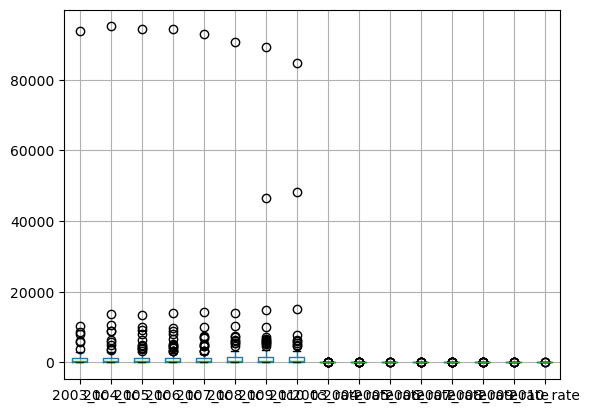

In [47]:
df_rape_stats.boxplot()